In [25]:
import numpy as np
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import copy
from pprint import pprint
from astropy.io import fits as pyfits
%matplotlib inline

### Read in data

In [26]:
alldata = fits.open('SDSS_HSC.fits')

In [27]:
cols = alldata[1].columns

In [28]:
# read in both sets of data
LowZQuasars = fits.open('QuasarMatchComplete.fits')
SDSSdata = LowZQuasars[1].data

HighZQuasars = fits.open('SDSS_HSC.fits')
BOSSdata = HighZQuasars[1].data

### Calculate magnitude of galaxies

In [29]:
def galaxy_mag(Mc, Mp):
    # 0 magnitude meaningless in this case. ignore them
    if Mc == 0 or Mp == 0 or Mc == np.nan or Mp == np.nan:
        return float(np.nan)
    # where Mc is the complete model magnitude and  Mp is the quasar PSF magnitude
    return -2.5*np.log10((10**(-Mc/2.5)) - 10**(-Mp/2.5))


## List of mags of PSFs and Cmodels

In [30]:
# info from both sets
# H indicates high redshift, L indicates low redshift

#PSF and Cmodel for each color
rmag_PSF_BOSS = copy.copy(BOSSdata['rmag_psf'])
rmag_Cmodel_BOSS = copy.copy(BOSSdata['rmag_cmodel'])
gmag_PSF_BOSS = copy.copy(BOSSdata['gmag_psf'])
gmag_Cmodel_BOSS = copy.copy(BOSSdata['gmag_cmodel'])
imag_PSF_BOSS = copy.copy(BOSSdata['imag_psf'])
imag_Cmodel_BOSS = copy.copy(BOSSdata['imag_cmodel'])
zmag_PSF_BOSS = copy.copy(BOSSdata['zmag_psf'])
zmag_Cmodel_BOSS = copy.copy(BOSSdata['zmag_cmodel'])
ymag_PSF_BOSS = copy.copy(BOSSdata['ymag_psf'])
ymag_Cmodel_BOSS = copy.copy(BOSSdata['ymag_cmodel'])
Z_BOSS = copy.copy(BOSSdata['Z'])


# setting up galaxy magnitude lists with correct length
galaxy_magR_BOSS = np.zeros(len(BOSSdata['rmag_psf']))
galaxy_magG_BOSS = np.zeros(len(BOSSdata['gmag_psf']))#,  dtype=np.float64)
galaxy_magI_BOSS = np.zeros(len(BOSSdata['imag_psf']))
galaxy_magZ_BOSS = np.zeros(len(BOSSdata['zmag_psf']))
galaxy_magY_BOSS = np.zeros(len(BOSSdata['ymag_psf']))

##########################


rmag_PSF_SDSS = copy.copy(SDSSdata['rmag_psf'])
rmag_Cmodel_SDSS = copy.copy(SDSSdata['rmag_cmodel'])
gmag_PSF_SDSS = copy.copy(SDSSdata['gmag_psf'])
gmag_Cmodel_SDSS = copy.copy(SDSSdata['gmag_cmodel'])
imag_PSF_SDSS = copy.copy(SDSSdata['imag_psf'])
imag_Cmodel_SDSS = copy.copy(SDSSdata['imag_cmodel'])
zmag_PSF_SDSS = copy.copy(SDSSdata['zmag_psf'])
zmag_Cmodel_SDSS = copy.copy(SDSSdata['zmag_cmodel'])
ymag_PSF_SDSS = copy.copy(SDSSdata['ymag_psf'])
ymag_Cmodel_SDSS = copy.copy(SDSSdata['ymag_cmodel'])
Z_SDSS = copy.copy(SDSSdata['Z'])



galaxy_magR_SDSS = np.zeros(len(SDSSdata['rmag_psf']))
galaxy_magG_SDSS = np.zeros(len(SDSSdata['gmag_psf']))
galaxy_magI_SDSS = np.zeros(len(SDSSdata['imag_psf']))
galaxy_magZ_SDSS = np.zeros(len(SDSSdata['zmag_psf']))
galaxy_magY_SDSS = np.zeros(len(SDSSdata['ymag_psf']))


print len(Z_BOSS)
print len(Z_SDSS)

7091
2718


## Calculate galaxy magnitudes

In [31]:
#galaxy_magG_BOSS
#galaxy_magR_BOSS
#galaxy_magI_BOSS
#galaxy_magZ_BOSS
#galaxy_magY_BOSS

#galaxy_magG_SDSS
#galaxy_magR_SDSS
#galaxy_magI_SDSS
#galaxy_magZ_SDSS
#galaxy_magY_SDSS

print galaxy_mag(gmag_Cmodel_BOSS[0], gmag_PSF_BOSS[0])
print galaxy_mag(gmag_Cmodel_BOSS[1], gmag_PSF_BOSS[1])

#i = 0
#galmag = 0



# start with boss quasars
for i in range(len(Z_BOSS)): 
    galaxy_magG_BOSS[i] = galaxy_mag(gmag_Cmodel_BOSS[i], gmag_PSF_BOSS[i])
    galaxy_magR_BOSS[i] = galaxy_mag(rmag_Cmodel_BOSS[i], rmag_PSF_BOSS[i])
    galaxy_magI_BOSS[i] = galaxy_mag(imag_Cmodel_BOSS[i], imag_PSF_BOSS[i])
    galaxy_magZ_BOSS[i] = galaxy_mag(zmag_Cmodel_BOSS[i], zmag_PSF_BOSS[i])
    galaxy_magY_BOSS[i] = galaxy_mag(ymag_Cmodel_BOSS[i], ymag_PSF_BOSS[i])
    
i = 0

for i in range(len(Z_SDSS)):
    galaxy_magG_SDSS[i] = galaxy_mag(gmag_Cmodel_SDSS[i], gmag_PSF_SDSS[i])
    galaxy_magR_SDSS[i] = galaxy_mag(rmag_Cmodel_SDSS[i], rmag_PSF_SDSS[i])
    galaxy_magI_SDSS[i] = galaxy_mag(imag_Cmodel_SDSS[i], imag_PSF_SDSS[i])
    galaxy_magZ_SDSS[i] = galaxy_mag(zmag_Cmodel_SDSS[i], zmag_PSF_SDSS[i])
    galaxy_magY_SDSS[i] = galaxy_mag(ymag_Cmodel_SDSS[i], ymag_PSF_SDSS[i])
    


23.1182075712
nan


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


## Calculate the colors of each galaxy

In [32]:
galaxy_BOSS_GR =  np.zeros(len(Z_BOSS))
galaxy_BOSS_RI = np.zeros(len(Z_BOSS))
galaxy_BOSS_IZ = np.zeros(len(Z_BOSS))
galaxy_BOSS_ZY = np.zeros(len(Z_BOSS))

galaxy_SDSS_GR = np.zeros(len(Z_SDSS))
galaxy_SDSS_RI = np.zeros(len(Z_SDSS))
galaxy_SDSS_IZ = np.zeros(len(Z_SDSS))
galaxy_SDSS_ZY = np.zeros(len(Z_SDSS))

# remove if a magnitude in either list is >25 because we would not see that

#i = 0
#for i in range(len(galaxy_magG_BOSS)):
    #if galaxy_magG_BOSS[i] > 30 or galaxy_magR_BOSS[i] > 30:
        #galaxy_BOSS_GR[i] = float('nan')
    #else:
        #galaxy_BOSS_GR[i] = galaxy_magG_BOSS[i] - galaxy_magR_BOSS[i]
        
#i = 0
#for i in range(len(galaxy_magR_BOSS)):
    #if galaxy_magR_BOSS[i] > 30 or galaxy_magI_BOSS[i] > 30:
        #galaxy_BOSS_RI[i] = float('nan')
    #else:
        #galaxy_BOSS_RI[i] = galaxy_magR_BOSS[i] - galaxy_magI_BOSS[i]



galaxy_BOSS_GR = galaxy_magG_BOSS - galaxy_magR_BOSS
galaxy_BOSS_RI = galaxy_magR_BOSS - galaxy_magI_BOSS
galaxy_BOSS_IZ = galaxy_magI_BOSS - galaxy_magZ_BOSS
galaxy_BOSS_ZY = galaxy_magZ_BOSS - galaxy_magY_BOSS

print galaxy_BOSS_RI

galaxy_SDSS_GR = galaxy_magG_SDSS - galaxy_magR_SDSS
galaxy_SDSS_RI = galaxy_magR_SDSS - galaxy_magI_SDSS
galaxy_SDSS_IZ = galaxy_magI_SDSS - galaxy_magZ_SDSS
galaxy_SDSS_ZY = galaxy_magZ_SDSS - galaxy_magY_SDSS

[-0.38361992 -0.14460611         nan ...,         nan         nan
         nan]


## Create different FITs files - one for pure mag data and one for processed (<=25 magnitude; !=0 ) data

In [64]:
mag_BOSS_data = fits.PrimaryHDU()
mag_SDSS_data = fits.PrimaryHDU()
mag_BOSS_modified_data = fits.PrimaryHDU()
mag_SDSS_modified_data = fits.PrimaryHDU()

### FITs file for magnitude data- ALL magnitude data
col1_BOSS = fits.Column(name='Z', format='E', array=Z_BOSS)
col2_BOSS = fits.Column(name='Galaxy G magnitude', format='E', array=galaxy_magG_BOSS)
col3_BOSS = fits.Column(name='Galaxy R magnitude', format='E', array=galaxy_magR_BOSS)
col4_BOSS = fits.Column(name='Galaxy I magnitude', format='E', array=galaxy_magI_BOSS)
col5_BOSS = fits.Column(name='Galaxy Z magnitude', format='E', array=galaxy_magZ_BOSS)
col6_BOSS = fits.Column(name='Galaxy Y magnitude', format='E', array=galaxy_magY_BOSS)

col7_BOSS = fits.Column(name='Quasar G magnitude', format='E', array=gmag_PSF_BOSS)
col8_BOSS = fits.Column(name='Quasar R magnitude', format='E', array=rmag_PSF_BOSS)
col9_BOSS = fits.Column(name='Quasar I magnitude', format='E', array=imag_PSF_BOSS)
col10_BOSS = fits.Column(name='Quasar Z magnitude', format='E', array=zmag_PSF_BOSS)
col11_BOSS = fits.Column(name='Quasar Y magnitude', format='E', array=ymag_PSF_BOSS)

cols_BOSS = fits.ColDefs([col1_BOSS, col2_BOSS, col3_BOSS, col4_BOSS, col5_BOSS, col6_BOSS,
                         col7_BOSS, col8_BOSS, col9_BOSS, col10_BOSS,])

BOSS_table = fits.TableHDU.from_columns(cols_BOSS)

#BOSS_table.writeto('BOSS_table_test1.fits')




#BOSS_quasars = fits.open('BOSS_table_test1.fits')
#print BOSS_quasars[1].columns







col1_SDSS = fits.Column(name='Z', format='E', array=Z_SDSS)
col2_SDSS = fits.Column(name='Galaxy G magnitude', format='E', array=galaxy_magG_SDSS)
col3_SDSS = fits.Column(name='Galaxy R magnitude', format='E', array=galaxy_magR_SDSS)
col4_SDSS = fits.Column(name='Galaxy I magnitude', format='E', array=galaxy_magI_SDSS)
col5_SDSS = fits.Column(name='Galaxy Z magnitude', format='E', array=galaxy_magZ_SDSS)
col6_SDSS = fits.Column(name='Galaxy Y magnitude', format='E', array=galaxy_magY_SDSS)

col7_SDSS = fits.Column(name='Quasar G magnitude', format='E', array=gmag_PSF_SDSS)
col8_SDSS = fits.Column(name='Quasar R magnitude', format='E', array=rmag_PSF_SDSS)
col9_SDSS = fits.Column(name='Quasar I magnitude', format='E', array=imag_PSF_SDSS)
col10_SDSS = fits.Column(name='Quasar Z magnitude', format='E', array=zmag_PSF_SDSS)
col11_SDSS = fits.Column(name='Quasar Y magnitude', format='E', array=ymag_PSF_SDSS)

cols_SDSS = fits.ColDefs([col1_SDSS, col2_SDSS, col3_SDSS, col4_SDSS, col5_SDSS, col6_SDSS,
                         col7_SDSS, col8_SDSS, col9_SDSS, col10_SDSS])

SDSS_table = fits.TableHDU.from_columns(cols_SDSS)


#SDSS_table.writeto('SDSS_table_test1.fits')




#print cols_BOSS
#print cols_SDSS


# fits.writeto?


### FITs file for PROCESSED magnitude data- only the ones we would be able to see (so not mag = 0 and not mag < 25)

## Calculate running median for each color and quasar

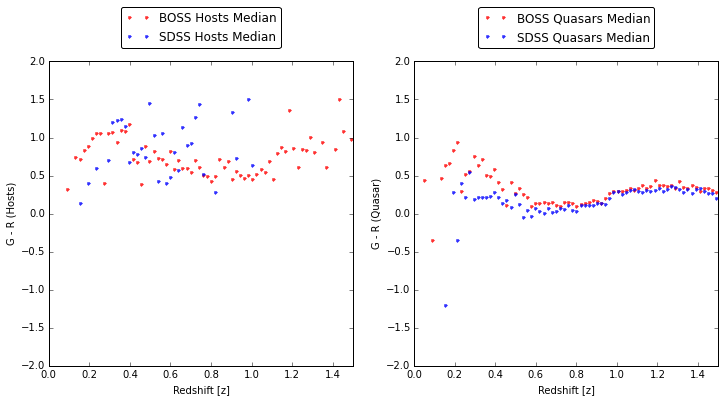

In [34]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

### LOOK AND SEE WHAT'S WRONG WITH SDSS DATA


total_bins_BOSS = 75
total_bins_SDSS = 75


# BOSS and SDSS Hosts
X_BOSS = Z_BOSS
Y_BOSS = galaxy_BOSS_GR
X_SDSS = Z_SDSS
Y_SDSS = galaxy_SDSS_GR


# binning
bins_BOSS = np.linspace(0, 1.5, total_bins_BOSS)
bins_SDSS = np.linspace(0, 1.5, total_bins_SDSS)

delta_BOSS = bins_BOSS[1]-bins_BOSS[0]
delta_SDSS = bins_SDSS[1]-bins_SDSS[0]


idx_BOSS  = np.digitize(X_BOSS,bins_BOSS)
running_median_BOSS = [np.median(Y_BOSS[idx_BOSS==k]) for k in range(total_bins_BOSS)]


idx_SDSS  = np.digitize(X_SDSS,bins_SDSS)
running_median_SDSS = [np.median(Y_SDSS[idx_SDSS==k]) for k in range(total_bins_SDSS)]

ax1 = plt.subplot(221, xlabel = 'Redshift [z]', ylabel = 'G - R (Hosts)')


#plt.scatter(X_BOSS,Y_BOSS,color='k',alpha=.2,s=1)
#plt.scatter(X_SDSS,Y_SDSS,color='k',alpha=.2,s=1)

plt.plot(bins_BOSS-delta_BOSS/2,running_median_BOSS,'r.',lw=4,alpha=.8, label='BOSS Hosts Median')
plt.plot(bins_SDSS-delta_SDSS/2,running_median_SDSS,'b.',lw=4,alpha=.8, label='SDSS Hosts Median')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax1.set_ylim([-2, 2])
ax1.set_xlim([0,1.5])
#plt.axis('tight')


#SDSS looks very scattered, but we haven't removed any 0's or >25s.
#BOSS is not at 0, hovers around .5?

#plt.show()

#########
# Quasar Graph 

ax2 = plt.subplot(222, xlabel = 'Redshift [z]', ylabel = 'G - R (Quasar)')

X_BOSS_Q = Z_BOSS
Y_BOSS_Q = gmag_PSF_BOSS - rmag_PSF_BOSS
X_SDSS_Q = Z_SDSS
Y_SDSS_Q = gmag_PSF_SDSS - rmag_PSF_SDSS

idx_BOSS_Q  = np.digitize(X_BOSS_Q,bins_BOSS)
idx_SDSS_Q  = np.digitize(X_SDSS_Q,bins_SDSS)

running_median_BOSS_Q = [np.median(Y_BOSS_Q[idx_BOSS_Q==k]) for k in range(total_bins_BOSS)]
running_median_SDSS_Q = [np.median(Y_SDSS_Q[idx_SDSS_Q==k]) for k in range(total_bins_SDSS)]

plt.plot(bins_BOSS-delta_BOSS/2,running_median_BOSS_Q,'r.',lw=4,alpha=.8, label='BOSS Quasars Median')
plt.plot(bins_SDSS-delta_SDSS/2,running_median_SDSS_Q,'b.',lw=4,alpha=.8, label='SDSS Quasars Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax2.set_ylim([-2, 2])
ax2.set_xlim([0,1.5])
plt.show()

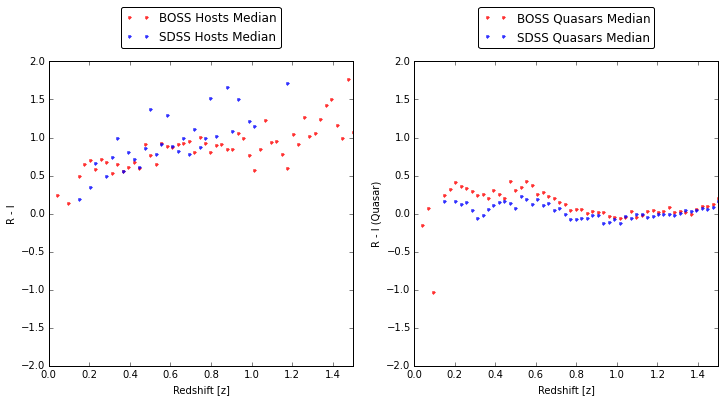

In [23]:

fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


total_bins = 75

# BOSS and SDSS Hosts
X_BOSS = Z_BOSS
Y_BOSS = galaxy_BOSS_RI
X_SDSS = Z_SDSS
Y_SDSS = galaxy_SDSS_RI


# binning
bins = np.linspace(0, 2, total_bins)
delta = bins[1]-bins[0]

idx_BOSS  = np.digitize(X_BOSS,bins)
running_median_BOSS = [np.median(Y_BOSS[idx_BOSS==k]) for k in range(total_bins)]


idx_SDSS  = np.digitize(X_SDSS,bins)
running_median_SDSS = [np.median(Y_SDSS[idx_SDSS==k]) for k in range(total_bins)]

ax1 = plt.subplot(221, xlabel = 'Redshift [z]', ylabel = 'R - I')




plt.plot(bins-delta/2,running_median_BOSS,'r.',lw=4,alpha=.8, label='BOSS Hosts Median')
plt.plot(bins-delta/2,running_median_SDSS,'b.',lw=4,alpha=.8, label='SDSS Hosts Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)


ax1.set_ylim([-2, 2])
ax1.set_xlim([0,1.5])




#########
# Quasar Graph 

ax2 = plt.subplot(222, xlabel = 'Redshift [z]', ylabel = 'R - I (Quasar)')

X_BOSS_Q = Z_BOSS
Y_BOSS_Q = rmag_PSF_BOSS - imag_PSF_BOSS
X_SDSS_Q = Z_SDSS
Y_SDSS_Q = rmag_PSF_SDSS - imag_PSF_SDSS

idx_BOSS_Q  = np.digitize(X_BOSS_Q,bins)
idx_SDSS_Q  = np.digitize(X_SDSS_Q,bins)

running_median_BOSS_Q = [np.median(Y_BOSS_Q[idx_BOSS_Q==k]) for k in range(total_bins)]
running_median_SDSS_Q = [np.median(Y_SDSS_Q[idx_SDSS_Q==k]) for k in range(total_bins)]

plt.plot(bins-delta/2,running_median_BOSS_Q,'r.',lw=4,alpha=.8, label='BOSS Quasars Median')
plt.plot(bins-delta/2,running_median_SDSS_Q,'b.',lw=4,alpha=.8, label='SDSS Quasars Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)


ax2.set_ylim([-2, 2])
ax2.set_xlim([0,1.5])
plt.show()

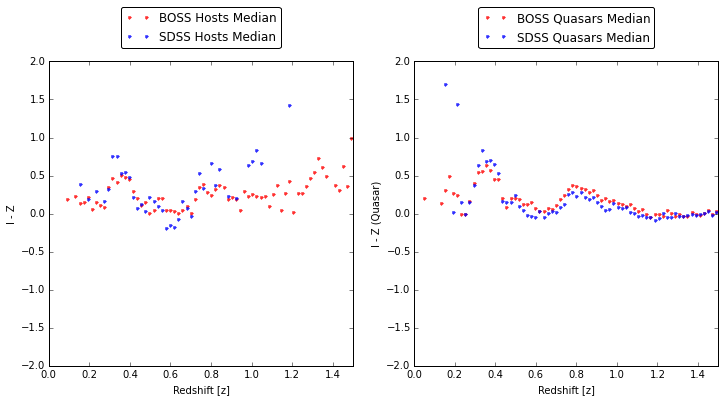

In [31]:

fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


total_bins = 75

# BOSS and SDSS Hosts
X_BOSS = Z_BOSS
Y_BOSS = galaxy_BOSS_IZ
X_SDSS = Z_SDSS
Y_SDSS = galaxy_SDSS_IZ


# binning
bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

idx_BOSS  = np.digitize(X_BOSS,bins)
running_median_BOSS = [np.median(Y_BOSS[idx_BOSS==k]) for k in range(total_bins)]


idx_SDSS  = np.digitize(X_SDSS,bins)
running_median_SDSS = [np.median(Y_SDSS[idx_SDSS==k]) for k in range(total_bins)]

ax1 = plt.subplot(221, xlabel = 'Redshift [z]', ylabel = 'I - Z')



plt.plot(bins-delta/2,running_median_BOSS,'r.',lw=4,alpha=.8, label='BOSS Hosts Median')
plt.plot(bins-delta/2,running_median_SDSS,'b.',lw=4,alpha=.8, label='SDSS Hosts Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)



ax1.set_ylim([-2, 2])
ax1.set_xlim([0,1.5])




#########
# Quasar Graph 

ax2 = plt.subplot(222, xlabel = 'Redshift [z]', ylabel = 'I - Z (Quasar)')

X_BOSS_Q = Z_BOSS
Y_BOSS_Q = imag_PSF_BOSS - zmag_PSF_BOSS
X_SDSS_Q = Z_SDSS
Y_SDSS_Q = imag_PSF_SDSS - zmag_PSF_SDSS

idx_BOSS_Q  = np.digitize(X_BOSS_Q,bins)
idx_SDSS_Q  = np.digitize(X_SDSS_Q,bins)

running_median_BOSS_Q = [np.median(Y_BOSS_Q[idx_BOSS_Q==k]) for k in range(total_bins)]
running_median_SDSS_Q = [np.median(Y_SDSS_Q[idx_SDSS_Q==k]) for k in range(total_bins)]

plt.plot(bins-delta/2,running_median_BOSS_Q,'r.',lw=4,alpha=.8, label='BOSS Quasars Median')
plt.plot(bins-delta/2,running_median_SDSS_Q,'b.',lw=4,alpha=.8, label='SDSS Quasars Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)


ax2.set_ylim([-2, 2])
ax2.set_xlim([0,1.5])
plt.show()

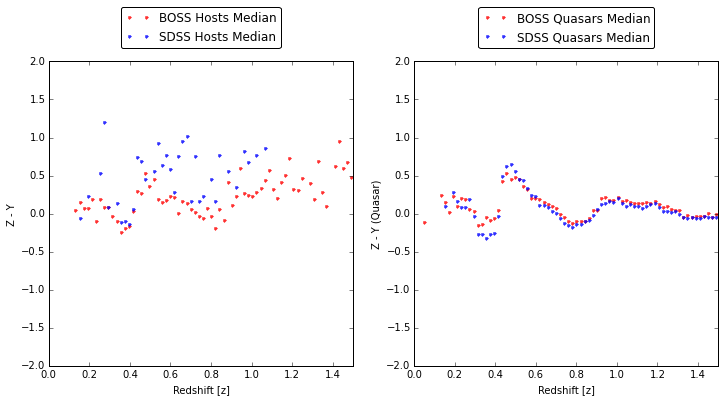

In [32]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)

total_bins = 75

# BOSS and SDSS Hosts
X_BOSS = Z_BOSS
Y_BOSS = galaxy_BOSS_ZY
X_SDSS = Z_SDSS
Y_SDSS = galaxy_SDSS_ZY


# binning
bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

idx_BOSS  = np.digitize(X_BOSS,bins)
running_median_BOSS = [np.median(Y_BOSS[idx_BOSS==k]) for k in range(total_bins)]



idx_SDSS  = np.digitize(X_SDSS,bins)
running_median_SDSS = [np.median(Y_SDSS[idx_SDSS==k]) for k in range(total_bins)]

ax1 = plt.subplot(221, xlabel = 'Redshift [z]', ylabel = 'Z - Y')



plt.plot(bins-delta/2,running_median_BOSS,'r.',lw=4,alpha=.8, label='BOSS Hosts Median')
plt.plot(bins-delta/2,running_median_SDSS,'b.',lw=4,alpha=.8, label='SDSS Hosts Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)



ax1.set_ylim([-2, 2])
ax1.set_xlim([0,1.5])


#########
# Quasar Graph 

ax2 = plt.subplot(222, xlabel = 'Redshift [z]', ylabel = 'Z - Y (Quasar)')

X_BOSS_Q = Z_BOSS
Y_BOSS_Q = zmag_PSF_BOSS - ymag_PSF_BOSS
X_SDSS_Q = Z_SDSS
Y_SDSS_Q = zmag_PSF_SDSS - ymag_PSF_SDSS

idx_BOSS_Q  = np.digitize(X_BOSS_Q,bins)
idx_SDSS_Q  = np.digitize(X_SDSS_Q,bins)

running_median_BOSS_Q = [np.median(Y_BOSS_Q[idx_BOSS_Q==k]) for k in range(total_bins)]
running_median_SDSS_Q = [np.median(Y_SDSS_Q[idx_SDSS_Q==k]) for k in range(total_bins)]

plt.plot(bins-delta/2,running_median_BOSS_Q,'r.',lw=4,alpha=.8, label='BOSS Quasars Median')
plt.plot(bins-delta/2,running_median_SDSS_Q,'b.',lw=4,alpha=.8, label='SDSS Quasars Median')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)


ax2.set_ylim([-2, 2])
ax2.set_xlim([0,1.5])
plt.show()

In [33]:
# only 10% of the I BAND for the galaxy color


# HIGH RANGE QUASARS


# lowercase letter g r i z y = band
# uppercase H/L = high/low redshift
# uppercase P/C = PSF or Composite model (quasar or all light)

galaxy_magYH = []
galaxy_magZH = []
galaxy_magIH = []
galaxy_magRH = []
galaxy_magGH = []

i = 0
galmag = 0




for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    if galmag - imagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galmagYH = galaxy_mag(ymagCH[i], ymagPH[i])
        galmagZH = galaxy_mag(zmagCH[i], zmagPH[i])
        galmagIH = galaxy_mag(imagCH[i], imagPH[i])
        galmagRH = galaxy_mag(rmagCH[i], rmagPH[i])
        galmagGH = galaxy_mag(gmagCH[i], gmagPH[i])
        
        galaxy_magYH.append(galmagYH)
        galaxy_magZH.append(galmagZH)
        galaxy_magIH.append(galmagIH)
        galaxy_magRH.append(galmagRH)
        galaxy_magGH.append(galmagGH)
    else:
        galaxy_magYH.append(np.nan)
        galaxy_magZH.append(np.nan)
        galaxy_magIH.append(np.nan)
        galaxy_magRH.append(np.nan)
        galaxy_magGH.append(np.nan)


        
# LOW RANGE QUASARS

galaxy_magYL = []
galaxy_magZL = []
galaxy_magIL = []
galaxy_magRL = []
galaxy_magGL = []


i = 0
galmag = 0

for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    if galmag - imagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galmagYL = galaxy_mag(ymagCL[i], ymagPL[i])
        galmagZL = galaxy_mag(zmagCL[i], zmagPL[i])
        galmagIL = galaxy_mag(imagCL[i], imagPL[i])
        galmagRL = galaxy_mag(rmagCL[i], rmagPL[i])
        galmagGL = galaxy_mag(gmagCL[i], gmagPL[i])
        
        galaxy_magYL.append(galmagYL)
        galaxy_magZL.append(galmagZL)
        galaxy_magIL.append(galmagIL)
        galaxy_magRL.append(galmagRL)
        galaxy_magGL.append(galmagGL)
    else:
        galaxy_magYL.append(np.nan)
        galaxy_magZL.append(np.nan)
        galaxy_magIL.append(np.nan)
        galaxy_magRL.append(np.nan)
        galaxy_magGL.append(np.nan)



        
        
        
        
        
galaxy_magYH = np.asarray(galaxy_magYH)
galaxy_magZH = np.asarray(galaxy_magZH)
galaxy_magIH = np.asarray(galaxy_magIH)
galaxy_magRH = np.asarray(galaxy_magRH)
galaxy_magGH = np.asarray(galaxy_magGH)
        
        
galaxy_magYL = np.asarray(galaxy_magYL)
galaxy_magZL = np.asarray(galaxy_magZL)
galaxy_magIL = np.asarray(galaxy_magIL)
galaxy_magRL = np.asarray(galaxy_magRL)
galaxy_magGL = np.asarray(galaxy_magGL)

NameError: name 'imagPH' is not defined

In [ ]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


### info for first plots (all comparisons)

xH = ZH
xL = ZL
colorH = imagPH - zmagPH
colorL = imagPL - zmagPL
colortext = 'I - Z'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magIH - galaxy_magZH
galaxyLcolor = galaxy_magIL - galaxy_magZL

## info for second plots (10% limit)
i = 0
galmag = 0
galaxy_magIH10 = []
galaxy_magZH10 = []
for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    if galmag - imagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIH10.append(galmag)
    else:
        galaxy_magIH10.append(np.nan)
i = 0
galmag = 0

for i in range(len(zmagPH)):
    galmag = galaxy_mag(zmagCH[i], zmagPH[i])
    if galmag - zmagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magZH10.append(galmag)
    else:
        galaxy_magZH10.append(np.nan)

####
i = 0
galmag = 0
galaxy_magIL10 = []
galaxy_magZL10 = []
for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    if galmag - imagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIL10.append(galmag)
    else:
        galaxy_magIL10.append(np.nan)
i = 0
galmag = 0

for i in range(len(zmagPL)):
    galmag = galaxy_mag(zmagCL[i], zmagPL[i])
    if galmag - zmagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magZL10.append(galmag)
    else:
        galaxy_magZL10.append(np.nan)

        
        
xH10 = ZH
xL10 = ZL
colorH10 = imagPH - zmagPH
colorL10 = imagPL - zmagPL

#xH10 = xH10[~np.isnan(colorH10)]
colorH10 = colorH10[~np.isnan(colorH10)]
#xL10 = xH10[~np.isnan(colorL10)]
colorL10 = colorL10[~np.isnan(colorL10)]
nbins = 200

nH10, _ = np.histogram(xH10, bins=nbins)
syH10, _ = np.histogram(xH10, bins=nbins, weights=colorH10)
meanH10 = syH10 / nH10

nL10, _ = np.histogram(xL10, bins=nbins)
syL10, _ = np.histogram(xL10, bins=nbins, weights=colorL10)
meanL10 = syL10 / nL10



galaxy_magIH10 = np.asarray(galaxy_magIH10)
galaxy_magZH10 = np.asarray(galaxy_magZH10)
galaxy_magIL10 = np.asarray(galaxy_magIL10)
galaxy_magZL10 = np.asarray(galaxy_magZL10)

galaxyH10color = galaxy_magIH10 - galaxy_magZH10
galaxyL10color = galaxy_magIL10 - galaxy_magZL10

xH10 = xH10[~np.isnan(galaxyH10color)]
galaxyH10color =  galaxyH10color[~np.isnan(galaxyH10color)]
colorH10 = colorH10[~np.isnan(colorH10)]
xL10 = xL10[~np.isnan(galaxyL10color)]
galaxyL10color =  galaxyL10color[~np.isnan(galaxyL10color)]

colorL10 = colorL10[~np.isnan(colorL10)]

total_bins = 50

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH10  = np.digitize(xH10,bins)
idxL10 = np.digitize(xL10, bins)


# plots start


# quasar colors 

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)

plt.xlabel('Redshift [z]', fontsize=14)
plt.ylabel('I - Z', fontsize=14)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')

# galaxy colors




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############


# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]


#print running_medianGH

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize =13)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)
plt.xlabel('Redshift [z]', fontsize=14)
plt.ylabel('I - Z', fontsize=14)


plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=1, fancybox=True, shadow=False, fontsize = 13)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])






# 10% limit
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)

total_bins = 55

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

k = 0
p = 0


print len(galaxyH10color)

running_medianGH10 = [np.median((galaxyH10color)[idxH10==k]) for k in range(total_bins)]
running_medianGL10 = [np.median((galaxyL10color)[idxL10==p]) for p in range(total_bins)]

print running_medianGH10
print running_medianGL10




#print len(idxH10)
#print len(idxL10)




ax5 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH10,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color >= 10%')
plt.plot(bins-delta/2,running_medianGL10,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color >= 10%')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


#plt.plot(xH10,galaxyH10color,'r.',lw=5,alpha=1.0, label = 'BOSS Host Color 10%')
#plt.plot(xL10,galaxyL10color,'b.',lw=5,alpha=1.0, label = 'SDSS Host Color 10%')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax5.set_ylim([-2, 2])
ax5.set_xlim([0,1.5])




In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)


### info for first plots (all comparisons)

xH = ZH
xL = ZL
colorH = zmagPH - ymagPH
colorL = zmagPL - ymagPL
colortext = 'Z - Y'

xH = xH[~np.isnan(colorH)]
colorH = colorH[~np.isnan(colorH)]
xL = xH[~np.isnan(colorL)]
colorL = colorL[~np.isnan(colorL)]
nbins = 200

nH, _ = np.histogram(xH, bins=nbins)
syH, _ = np.histogram(xH, bins=nbins, weights=colorH)
meanH = syH / nH

nL, _ = np.histogram(xL, bins=nbins)
syL, _ = np.histogram(xL, bins=nbins, weights=colorL)
meanL = syL / nL


total_bins = 75

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH  = np.digitize(ZH,bins)
idxL = np.digitize(ZL, bins)

galaxyHcolor = galaxy_magZH - galaxy_magYH
galaxyLcolor = galaxy_magZL - galaxy_magYL



######









## info for second plots (10% limit)
i = 0
galmag = 0
galaxy_magZH10 = []
galaxy_magYH10 = []
for i in range(len(imagPH)):
    galmag = galaxy_mag(imagCH[i], imagPH[i])
    if galmag - imagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magZH10.append(galmag)
    else:
        galaxy_magZH10.append(np.nan)
i = 0
galmag = 0

for i in range(len(zmagPH)):
    galmag = galaxy_mag(zmagCH[i], zmagPH[i])
    if galmag - zmagCH[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magYH10.append(galmag)
    else:
        galaxy_magYH10.append(np.nan)

        
        
        
        
        
        
        
        
####
i = 0
galmag = 0
galaxy_magIL10 = []
galaxy_magZL10 = []
for i in range(len(imagPL)):
    galmag = galaxy_mag(imagCL[i], imagPL[i])
    if galmag - imagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magIL10.append(galmag)
    else:
        galaxy_magIL10.append(np.nan)
i = 0
galmag = 0

for i in range(len(zmagPL)):
    galmag = galaxy_mag(zmagCL[i], zmagPL[i])
    if galmag - zmagCL[i] < 2.5:   # 2.5 = 10%, 5 = 1%
        galaxy_magZL10.append(galmag)
    else:
        galaxy_magZL10.append(np.nan)












        
xH10 = ZH
xL10 = ZL
colorH10 = zmagPH - ymagPH
colorL10 = zmagPL - ymagPL

#xH10 = xH10[~np.isnan(colorH10)]
colorH10 = colorH10[~np.isnan(colorH10)]
#xL10 = xH10[~np.isnan(colorL10)]
colorL10 = colorL10[~np.isnan(colorL10)]
nbins = 200

nH10, _ = np.histogram(xH10, bins=nbins)
syH10, _ = np.histogram(xH10, bins=nbins, weights=colorH10)
meanH10 = syH10 / nH10

nL10, _ = np.histogram(xL10, bins=nbins)
syL10, _ = np.histogram(xL10, bins=nbins, weights=colorL10)
meanL10 = syL10 / nL10



galaxy_magZH10 = np.asarray(galaxy_magZH10)
galaxy_magYH10 = np.asarray(galaxy_magYH10)
galaxy_magZL10 = np.asarray(galaxy_magZL10)
galaxy_magYL10 = np.asarray(galaxy_magYL10)

galaxyH10color = galaxy_magZH10 - galaxy_magYH10
galaxyL10color = galaxy_magZL10 - galaxy_magYL10


xH10 = xH10[~np.isnan(galaxyH10color)]
galaxyH10color =  galaxyH10color[~np.isnan(galaxyH10color)]
colorH10 = colorH10[~np.isnan(colorH10)]
xL10 = xL10[~np.isnan(galaxyL10color)]
galaxyL10color =  galaxyL10color[~np.isnan(galaxyL10color)]

colorL10 = colorL10[~np.isnan(colorL10)]

total_bins = 50

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]
idxH10  = np.digitize(xH10,bins)
idxL10 = np.digitize(xL10, bins)


# plots start


# quasar colors 

ax4 = plt.subplot(224, xlabel = 'Redshift [z]', ylabel = colortext)
ax4.set_ylim([-2, 2])
ax4.set_xlim([0,1.5])


running_medianH = [np.median((colorH)[idxH==c]) for c in range(total_bins)]
running_medianL = [np.median((colorL)[idxL==q]) for q in range(total_bins)]

plt.plot(bins-delta/2,running_medianH,'r.',lw=5,alpha=.8, label = 'Median of BOSS Quasar Color')
plt.plot(bins-delta/2,running_medianL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Quasar Color')





plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = 'Z - Y (galaxy)')

# galaxy colors







plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])
#############


# Galaxy color medians



bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]



running_medianGH = [np.median((galaxyHcolor)[idxH==k]) for k in range(total_bins)]
running_medianGL = [np.median((galaxyLcolor)[idxL==p]) for p in range(total_bins)]


#print running_medianGH

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)




ax3 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color')

plt.plot(bins-delta/2,running_medianGL,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


print running_medianGH
print running_medianGL




plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax3.set_ylim([-2, 2])
ax3.set_xlim([0,1.5])






# 10% limit
fig1 = plt.figure()
fig1.set_figheight(10)
fig1.set_figwidth(10)

total_bins = 55

bins = np.linspace(0, 1.5, total_bins)
delta = bins[1]-bins[0]

k = 0
p = 0


print len(galaxyH10color)

running_medianGH10 = [np.median((galaxyH10color)[idxH10==k]) for k in range(total_bins)]
running_medianGL10 = [np.median((galaxyL10color)[idxL10==p]) for p in range(total_bins)]




#print len(idxH10)
#print len(idxL10)




ax5 = plt.subplot(223, xlabel = 'Redshift [z]', ylabel = colortext)

plt.plot(bins-delta/2,running_medianGH10,'r.',lw=5,alpha=1.0, label = 'Median of BOSS Host Color >= 10%')
plt.plot(bins-delta/2,running_medianGL10,'b.',lw=5,alpha=1.0, label = 'Median of SDSS Host Color >= 10%')
#plt.plot(zeroy, zero, '--', color = 'black', alpha = .6, linewidth=2)


#plt.plot(xH10,galaxyH10color,'r.',lw=5,alpha=1.0, label = 'BOSS Host Color 10%')
#plt.plot(xL10,galaxyL10color,'b.',lw=5,alpha=1.0, label = 'SDSS Host Color 10%')



plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=1, fancybox=True, shadow=False)

ax5.set_ylim([-2, 2])
ax5.set_xlim([0,1.5])




## Plan
### Color comparison
We want to compare the median colors of quasars to the median colors of the hosts. In order to do this:

* calculate galaxy magnitude for each quasar (Low L and High H quasars)
* calculate the colors G-R R-I I-Z Z-Y for the quasars and the galaxies (Low and High- 8 lists total)
    - Need 8 Z too (ZL and ZH for each color above)
* create graphs for these- these are the pure comparisons for every color (the running median)

### Refined version - 10% I band
* Now we only want to look at host galaxies where the PSF magnitudes in the i band of the galaxy comprises at least 10% of the cModel light
* create 2 new lists, one for low one for high. If the PSF of the i band for the host galaxy is >= 10%, allow the quasar to appear on the graph.
* with these, graph the running median of these as well

## The colors

#### High Z quasars (BOSS Quasars)
* G - R = BOSS_GR
* R - I = BOSS_RI
* I - Z = BOSS_IZ
* Z - Y = BOSS_ZY

#### Low Z quasars (SDSS Quasars)
* G - R = SDSS_GR
* R - I = SDSS_RI
* I - Z = SDSS_IZ
* Z - Y = SDSS_ZY


### 10% limit colors
#### High Z quasars (BOSS Quasars)
* G - R = BOSS_GR_lim
* R - I = BOSS_RI_lim
* I - Z = BOSS_IZ_lim
* Z - Y = BOSS_ZY_lim

#### Low Z quasars (SDSS Quasars)
* G - R = SDSS_GR_lim
* R - I = SDSS_RI_lim
* I - Z = SDSS_IZ_lim
* Z - Y = SDSS_ZY_lim

## senior thesis
- more correct way of doing subtraction
- intensity vs distance from center
- need PSF SHAPE, and cmodel SHAPE - find using STARS
- 10 AM friday mornings

- Michael Lemonick
